In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [81]:
data = pd.read_csv(r"C:\Users\sprin\Downloads\sleep_score.csv")

In [82]:
data


,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Amount of Coffee,Energy Level,Mood
0,2024-11-12T08:11:00Z,81.0,NaN,81.0,NaN,111.0,55.0,0.075452,NaN,NaN,NaN
1,2024-11-11T06:12:00Z,78.0,NaN,78.0,NaN,91.0,55.0,0.096990,NaN,NaN,NaN
2,2024-11-10T06:36:30Z,76.0,NaN,76.0,NaN,108.0,54.0,0.081021,NaN,7.0,6.0
3,2024-11-09T06:12:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,6.0
4,2024-11-08T06:12:00Z,80.0,NaN,80.0,NaN,100.0,54.0,0.088859,5.0,7.0,7.0
5,2024-11-07T06:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.5
6,2024-11-06T06:40:00Z,77.0,NaN,77.0,NaN,104.0,54.0,0.080513,5.0,5.5,6.0
7,2024-11-05T06:34:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,7.5
8,2024-11-04T06:34:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.2
9,2024-11-03T06:34:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,6.0


In [83]:
data.describe()

,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Amount of Coffee,Energy Level,Mood
count,24.000000,0.0,24.000000,0.0,24.000000,24.000000,24.000000,16.000000,24.000000,19.000000
mean,79.416667,NaN,79.416667,NaN,97.166667,51.958333,0.081128,4.875000,6.929167,6.773684
std,7.683504,NaN,7.683504,NaN,18.551144,1.805286,0.010843,1.147461,0.812125,0.597069
min,55.000000,NaN,55.000000,NaN,50.000000,47.000000,0.058360,3.000000,5.500000,6.000000
25%,77.750000,NaN,77.750000,NaN,87.500000,51.000000,0.074941,4.000000,6.375000,6.350000
50%,81.000000,NaN,81.000000,NaN,97.500000,52.000000,0.080210,5.000000,7.000000,7.000000
75%,84.250000,NaN,84.250000,NaN,108.250000,53.000000,0.089243,5.250000,7.625000,7.000000
max,91.000000,NaN,91.000000,NaN,140.000000,55.000000,0.101311,7.000000,8.000000,8.000000


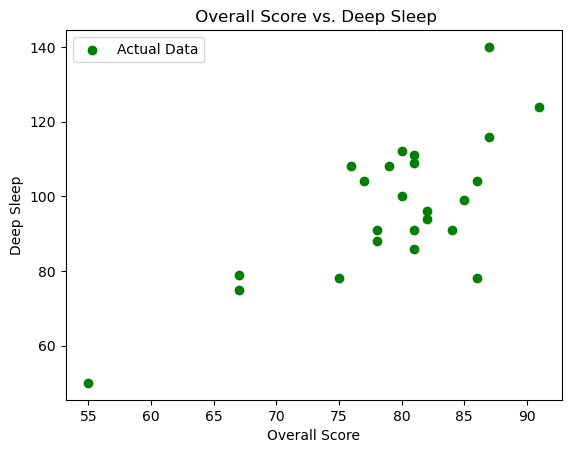

In [84]:
plt.scatter(data['overall_score'],data['deep_sleep_in_minutes'], color='green', label='Actual Data')
plt.xlabel('Overall Score')
plt.ylabel('Deep Sleep')
plt.title(' Overall Score vs. Deep Sleep')
plt.legend()
plt.show()

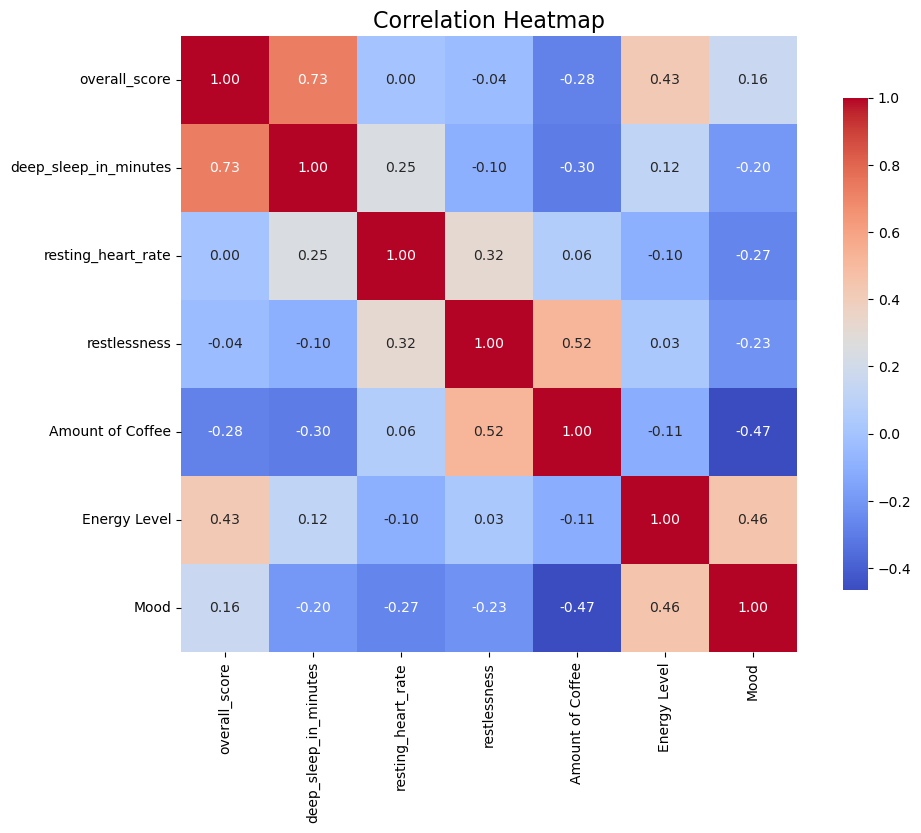

In [85]:
new1 =data[['overall_score' , 'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness', 'Amount of Coffee', 'Energy Level', 'Mood']]
correlation_matrix = new1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot= True, fmt= ".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show() 

using the data with missing values checking for correlations or linear correlations we can suspect that there's a moederate to strong correlation through the scatter plot, and heatmap  between deep sleep and overall score.

In [87]:
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date

After looking at the data I can say it's not cleaned so we need to check for duplicates  missing values and clean the data

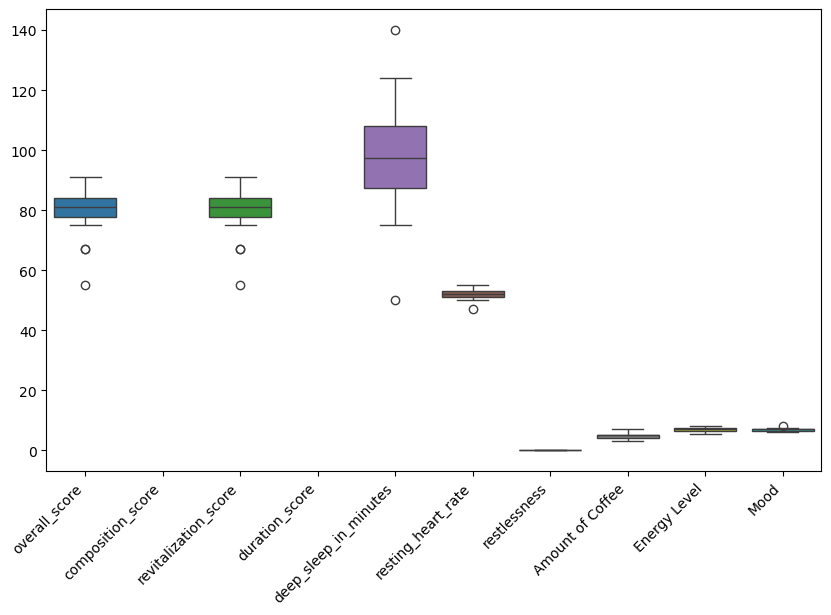

In [89]:

plt.figure(figsize=(10,6))
sns.boxplot(data.select_dtypes(include=[np.number]))
plt.xticks(rotation=45, ha='right')  
plt.show()


after looking at the boxplot on top we can see we have few outliers but we decided to keep them because removing them will distrub the flow of the data
and make the calcultions inaccarute aswell as it being data from machine implying the data is probably not error so we decide to not remove the outliers

In [91]:
duplicates = data.duplicated()  # This will return True for each duplicate row
print(duplicates)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool


we can see from the data that there's columns such as composition_score	 , duration_score	being entirly all missing data NaN valus so we drop then

this means there's no duplicates now we are going to fill missing values

In [94]:
data1 = data.copy()  
data1 = data1.drop(['composition_score', 'duration_score'], axis=1)
data1

,timestamp,overall_score,revitalization_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Amount of Coffee,Energy Level,Mood
0,2024-11-12,81.0,81.0,111.0,55.0,0.075452,NaN,NaN,NaN
1,2024-11-11,78.0,78.0,91.0,55.0,0.096990,NaN,NaN,NaN
2,2024-11-10,76.0,76.0,108.0,54.0,0.081021,NaN,7.0,6.0
3,2024-11-09,NaN,NaN,NaN,NaN,NaN,5.0,7.0,6.0
4,2024-11-08,80.0,80.0,100.0,54.0,0.088859,5.0,7.0,7.0
5,2024-11-07,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.5
6,2024-11-06,77.0,77.0,104.0,54.0,0.080513,5.0,5.5,6.0
7,2024-11-05,NaN,NaN,NaN,NaN,NaN,4.0,8.0,7.5
8,2024-11-04,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.2
9,2024-11-03,NaN,NaN,NaN,NaN,NaN,5.0,7.0,6.0


Now we're going to fix the data using the fillbfill method for it being time series data nature, and not affect the correlations between variables
since we checked correlations

In [96]:
new_data_fill =  data1.ffill().bfill()
new_data_fill.to_csv('Cleaned_Data0.csv', index=False)
new_data_fill

,timestamp,overall_score,revitalization_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Amount of Coffee,Energy Level,Mood
0,2024-11-12,81.0,81.0,111.0,55.0,0.075452,5.0,7.0,6.0
1,2024-11-11,78.0,78.0,91.0,55.0,0.096990,5.0,7.0,6.0
2,2024-11-10,76.0,76.0,108.0,54.0,0.081021,5.0,7.0,6.0
3,2024-11-09,76.0,76.0,108.0,54.0,0.081021,5.0,7.0,6.0
4,2024-11-08,80.0,80.0,100.0,54.0,0.088859,5.0,7.0,7.0
5,2024-11-07,80.0,80.0,100.0,54.0,0.088859,6.0,7.0,7.5
6,2024-11-06,77.0,77.0,104.0,54.0,0.080513,5.0,5.5,6.0
7,2024-11-05,77.0,77.0,104.0,54.0,0.080513,4.0,8.0,7.5
8,2024-11-04,77.0,77.0,104.0,54.0,0.080513,6.0,6.0,6.2
9,2024-11-03,77.0,77.0,104.0,54.0,0.080513,5.0,7.0,6.0


storing variables in a easy to accsse way

In [98]:
overall = new_data_fill['overall_score']
deep = new_data_fill['deep_sleep_in_minutes']
resting_heart_rate = new_data_fill['resting_heart_rate']
restlessness = new_data_fill['restlessness']
energy = new_data_fill['Energy Level']
mood = new_data_fill['Mood']
coffee = new_data_fill['Amount of Coffee']

calculting the pearonr correlation for the highest correlation

In [100]:
r1,p = stats.pearsonr(overall,deep)
r1

0.7555996865701787

The highest correlation we could find it's moderate to strong being 0.7
now we are going to make a scatter plot to see how it looks after filling the missing values

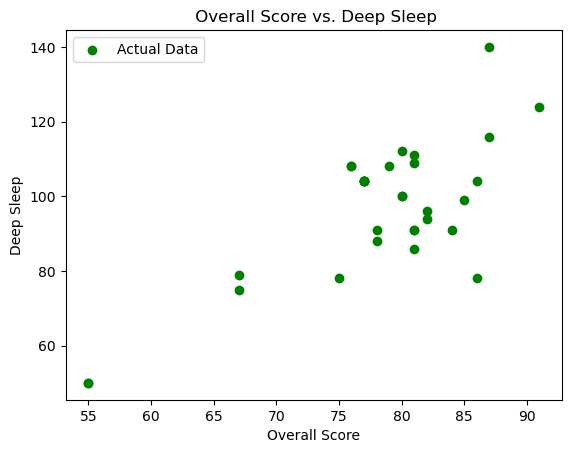

In [102]:
plt.scatter(new_data_fill['overall_score'],new_data_fill['deep_sleep_in_minutes'], color='green', label='Actual Data')
plt.xlabel('Overall Score')
plt.ylabel('Deep Sleep')
plt.title(' Overall Score vs. Deep Sleep')
plt.legend()
plt.show()

we created this scatter plot to check for linear relationships, we can see that there is one it's moderate to strong

Linear regression model

In [105]:
x = overall.values.reshape(-1,1)
y = deep.values.reshape(-1,1)

In [106]:
lin_reg = linear_model.LinearRegression()

In [107]:
lin_reg.fit(x,y)

LinearRegression()

In [108]:
pred_y = lin_reg.predict(x)

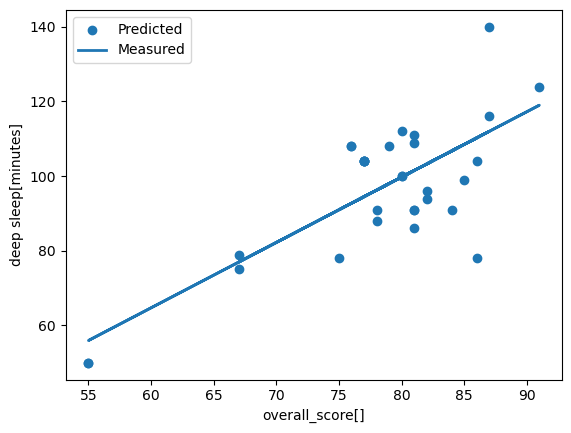

In [109]:
plt.scatter(overall,deep)
plt.plot(x,pred_y,linewidth="2") #add the predicted line to the plot
plt.legend(["Predicted","Measured"])
plt.xlabel("overall_score[]")
plt.ylabel("deep sleep[minutes]")
plt.show()

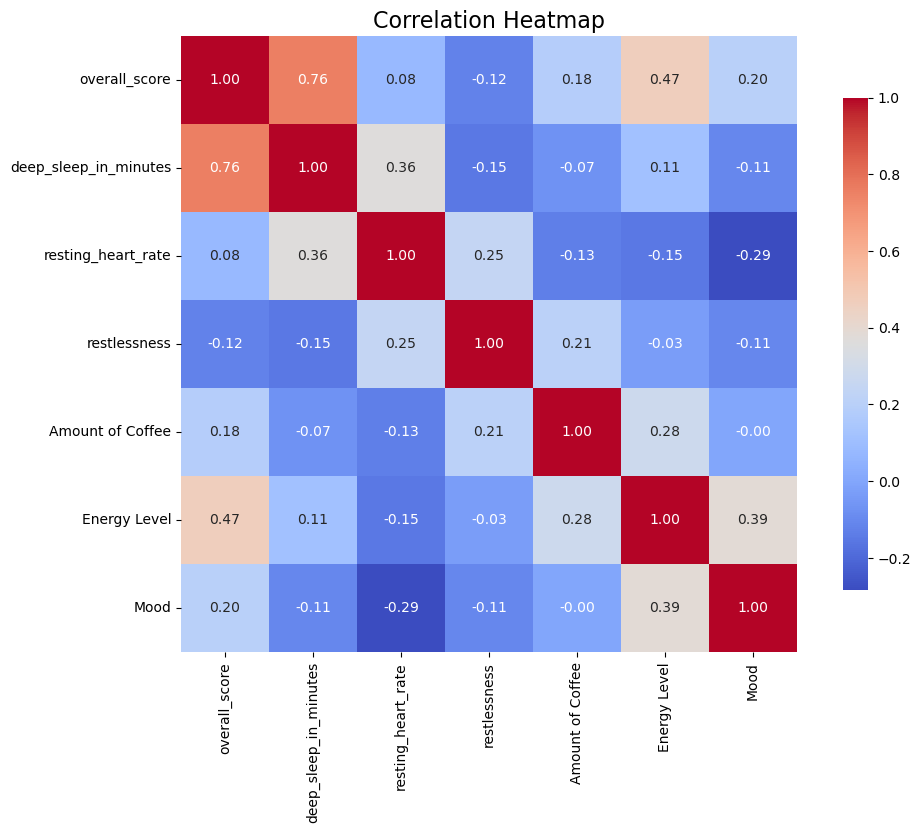

In [113]:
new = new_data_fill[['overall_score' , 'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness', 'Amount of Coffee', 'Energy Level', 'Mood']]
correlation_matrix = new.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot= True, fmt= ".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show() 

we can see that the highest correlation here is between overall sleep and deep sleep in minutes which we worked showed it before

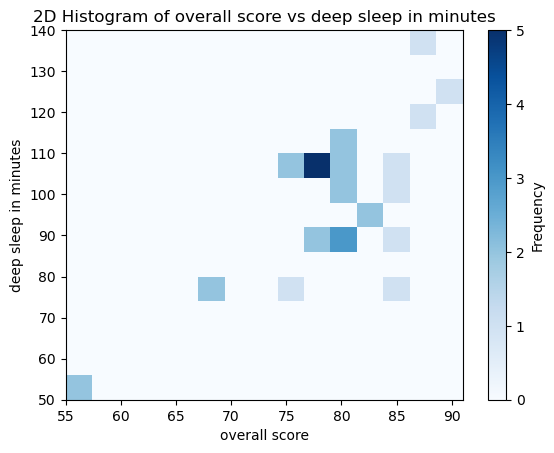

In [115]:
plt.hist2d(overall, deep, bins=(15, 15), cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('overall score')
plt.ylabel('deep sleep in minutes')
plt.title('2D Histogram of overall score vs deep sleep in minutes')
plt.show()


The 2D histogram reveals a positive correlation between the overall score and deep sleep duration. Data points are mostly concentrated in the range of overall scores between 75 and 85, and deep sleep durations between 90 and 110 minutes. The highest frequency of data points occurs around an overall score of 80 and deep sleep of 100 minutes. 

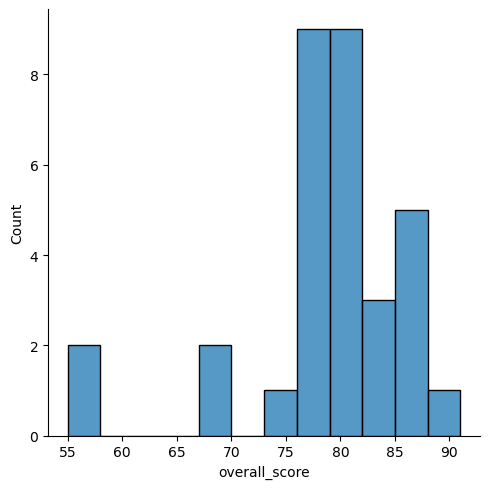

In [117]:
sns.displot(overall)

through this histogram we can conlcude that the data is centered between 75-90

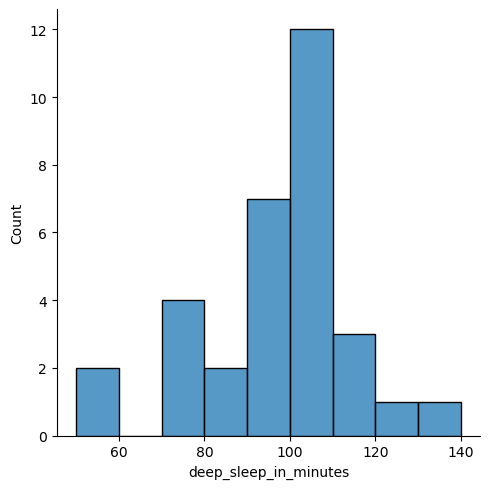

In [119]:
sns.displot(deep)

we can also conclude that the data is centered between 80 to 110

Concolusion of all
we can say that a pearsonr correlation with the value of r  = 0.75 is moederate to strong correlation, after fixing the data and filling missing values with fillbfill method because it's a time series data nature and don't want to ruin the linear correlation 
we can also conclude
concentration of Data: since the data for both variables (deep sleep and overall score) is concentrated in the ranges of 80-100 minutes for deep sleep and 75-90 for overall score, the relationship is more likely to hold true within these ranges.
in general  the overall score increases, deep sleep duration tends to increase as well.